<a href="https://colab.research.google.com/github/mariyakj/ASD/blob/main/mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
# Mount Google Drive if your data is stored there
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Define paths to your training and validation datasets
train_data_dir = '/content/drive/MyDrive/autism mri/Training'
val_data_dir = '/content/drive/MyDrive/autism mri/Testing'

In [ ]:
# Parameters
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess validation data
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 3167 images belonging to 2 classes.
Found 760 images belonging to 2 classes.


In [ ]:
# Calculate the steps_per_epoch based on the length of the training generator and batch size
steps_per_epoch_train = train_generator.samples // batch_size

# Similarly, calculate the steps_per_epoch for the validation data
steps_per_epoch_val = val_generator.samples // batch_size

In [ ]:

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=40,
    validation_data=val_generator,
    validation_steps=3,
    callbacks=[early_stop]
)


Epoch 1/40
98/98 [==============================] - 623s 6s/step - loss: 0.3361 - accuracy: 0.8354 - val_loss: 0.0561 - val_accuracy: 0.9792
Epoch 2/40
98/98 [==============================] - 208s 2s/step - loss: 0.0867 - accuracy: 0.9694 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 3/40
98/98 [==============================] - 209s 2s/step - loss: 0.0648 - accuracy: 0.9770 - val_loss: 0.0296 - val_accuracy: 0.9896
Epoch 4/40
98/98 [==============================] - 191s 2s/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0225 - val_accuracy: 0.9896
Epoch 5/40
98/98 [==============================] - 184s 2s/step - loss: 0.0467 - accuracy: 0.9828 - val_loss: 0.0182 - val_accuracy: 0.9896
Epoch 5: early stopping


In [ ]:

# Save the trained model to an HDF5 file
model.save('/content/drive/MyDrive/models/mri_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Mount Google Drive if your model is stored there
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your saved model
saved_model_path = '/content/drive/MyDrive/models/mri_model.h5'

# Load the model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Define the path to the image you want to predict
image_path = '/content/drive/MyDrive/autism mri/Testing/autistic/Te-pi_0273.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the pixel values

# Make the prediction
prediction = loaded_model.predict(img_array)

# Interpret the prediction
if prediction[0][0] < 0.5:
    print("Prediction: Class 1 (Yes)")
else:
    print("Prediction: Class 0 (No)")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 128ms/step
Prediction: Class 1 (Yes)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Load the validation data
val_data_dir = '/content/drive/MyDrive/autism mri/Testing'
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(150, 150),
    batch_size=1,  # Set batch size to 1 to ensure we get predictions for each sample
    class_mode='binary',
    shuffle=False  # Ensure that predictions match labels
)

# Make predictions for the validation set
predictions = loaded_model.predict(val_generator)

# Convert probabilities to class labels
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Get true labels
true_classes = val_generator.classes


report = classification_report(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)


print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Found 760 images belonging to 2 classes.
760/760 [==============================] - 18s 24ms/step
Accuracy: 0.5126731301939058

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.99      0.99      0.99       440

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760


Confusion Matrix:
[[315   5]
 [  4 436]]


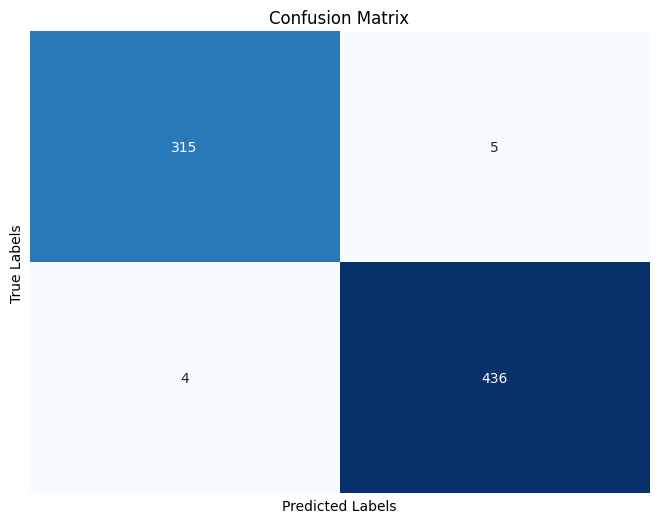

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the saved model
saved_model_path = '/content/drive/MyDrive/models/mri_model.h5'
loaded_model = tf.keras.models.load_model(saved_model_path)

# Make predictions on test data
test_predictions = loaded_model.predict(test_generator)

# Convert probabilities to binary labels
test_pred_labels = np.where(test_predictions > 0.5, 1, 0)

# Retrieve true labels from the generator
true_labels = test_generator.classes

# Calculate evaluation metrics
testing_accuracy = accuracy_score(true_labels, test_pred_labels)
precision = precision_score(true_labels, test_pred_labels)
recall = recall_score(true_labels, test_pred_labels)
f1 = f1_score(true_labels, test_pred_labels)

print(f"Testing Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


760/760 [==============================] - 16s 20ms/step
Testing Accuracy: 0.9882
Precision: 0.9887
Recall: 0.9909
F1-score: 0.9898


In [ ]:
print(loaded_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0